This notebook contains exploratory data analysis of covid-19 trials.

In [1]:
import requests
import json
import pandas as pd
import datetime
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [3]:
CDC_BASE_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&max_rnk=1000&fmt=json'

In [4]:
cdc_extract_fields = [
    'NCTId',
    'DesignAllocation',
    'DesignMasking',
    'DesignMaskingDescription',
    'DesignPrimaryPurpose',
    'EnrollmentCount',
    'InterventionName',
    'InterventionType',
    'LastKnownStatus',
    'LeadSponsorName',
    'OutcomeAnalysisStatisticalMethod',
    'OutcomeMeasureTimeFrame',
    'StartDate',
    'StudyFirstPostDate',
    'StudyFirstPostDateType',
    'StudyFirstSubmitDate',
    'StudyFirstSubmitQCDate',
    'StudyPopulation',
    'StudyType',
    'WhyStopped'
]

In [5]:
query_url = f'{CDC_BASE_URL}&fields={",".join(cdc_extract_fields)}'
print(query_url)

https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&max_rnk=1000&fmt=json&fields=NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,LeadSponsorName,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,StartDate,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,StudyPopulation,StudyType,WhyStopped


In [6]:
r = requests.get(query_url)
r.status_code

200

In [7]:
# Output too long
# r.text

In [7]:
j = json.loads(r.content)

In [8]:
df = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df.shape

(778, 21)

There are total 778 trials registered on clinicaltrials.gov for covid-19

In [9]:
df

,Rank,NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,...,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,StartDate,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,StudyPopulation,StudyType,WhyStopped
0,1,[NCT04342637],[],[],[],[],[40],[Practice details],[Other],[],...,[],[],"[April 10, 2020]","[April 13, 2020]",[Actual],"[April 7, 2020]","[April 8, 2020]",[- physicians working and practicing in gastro...,[Observational],[]
1,2,[NCT04323787],[],[],[],[],[50000],[observational],[Other],[],...,[],[],"[March 30, 2020]","[March 27, 2020]",[Actual],"[March 24, 2020]","[March 25, 2020]",[COVID-19 Hospitalized patients],[Observational],[]
2,3,[NCT04339322],[],[],[],[],[200],[Follow up],[Other],[],...,[],[],"[May 1, 2020]","[April 9, 2020]",[Actual],"[April 7, 2020]","[April 7, 2020]",[Patients with clinical presentation and confi...,[Observational],[]
3,4,[NCT04332380],[],[None (Open Label)],[],[Treatment],[10],[Plasma],[Drug],[],...,[],[],"[April 1, 2020]","[April 2, 2020]",[Actual],"[March 30, 2020]","[April 1, 2020]",[],[Interventional],[]
4,5,[NCT04330261],[],[],[],[],[12500],[Exposure (not intervention) - SARS-CoV-2 infe...,[Other],[],...,[],[],"[March 18, 2020]","[April 1, 2020]",[Actual],"[March 30, 2020]","[March 30, 2020]",[All children presenting to a participating ED...,[Observational],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,774,[NCT04326309],[],[],[],[],[1000],[],[],[],...,[],[],"[March 25, 2020]","[March 30, 2020]",[Actual],"[March 26, 2020]","[March 26, 2020]",[US resident participants downloading the Heal...,[Observational],[]
774,775,[NCT03620409],[],[],[],[],[290],[],[],[],...,[],[],"[May 9, 2018]","[August 8, 2018]",[Actual],"[May 15, 2018]","[August 3, 2018]",[primary care and community sample],[Observational],[]
775,776,[NCT04351880],[Randomized],[Single],[],[Other],[640],[Medically Tailored Meals],[Other],[],...,[],[],"[April 15, 2020]","[April 17, 2020]",[Actual],"[April 14, 2020]","[April 16, 2020]",[],[Interventional],[]
776,777,[NCT03261050],[],[],[],[],[180],"[Counter Attitudinal Therapy, Interpersonal Th...","[Behavioral, Behavioral]",[],...,[],[],"[July 10, 2017]","[August 24, 2017]",[Actual],"[August 17, 2017]","[August 22, 2017]",[Subjects for the initial R61 phase will be 60...,[Observational],[]


In [11]:
tt = df['NCTId'].str[0]
tt

0      NCT04342637
1      NCT04323787
2      NCT04339322
3      NCT04332380
4      NCT04330261
          ...     
773    NCT04326309
774    NCT03620409
775    NCT04351880
776    NCT03261050
777    NCT03922334
Name: NCTId, Length: 778, dtype: object

In [12]:
for col in df.columns[1:]:
    print(col)
    df[col] = df[col].str[0]

NCTId
DesignAllocation
DesignMasking
DesignMaskingDescription
DesignPrimaryPurpose
EnrollmentCount
InterventionName
InterventionType
LastKnownStatus
LeadSponsorName
OutcomeAnalysisStatisticalMethod
OutcomeMeasureTimeFrame
StartDate
StudyFirstPostDate
StudyFirstPostDateType
StudyFirstSubmitDate
StudyFirstSubmitQCDate
StudyPopulation
StudyType
WhyStopped


In [13]:
df

,Rank,NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,...,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,StartDate,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,StudyPopulation,StudyType,WhyStopped
0,1,NCT04342637,NaN,NaN,NaN,NaN,40,Practice details,Other,NaN,...,NaN,NaN,"April 10, 2020","April 13, 2020",Actual,"April 7, 2020","April 8, 2020",- physicians working and practicing in gastroi...,Observational,NaN
1,2,NCT04323787,NaN,NaN,NaN,NaN,50000,observational,Other,NaN,...,NaN,NaN,"March 30, 2020","March 27, 2020",Actual,"March 24, 2020","March 25, 2020",COVID-19 Hospitalized patients,Observational,NaN
2,3,NCT04339322,NaN,NaN,NaN,NaN,200,Follow up,Other,NaN,...,NaN,NaN,"May 1, 2020","April 9, 2020",Actual,"April 7, 2020","April 7, 2020",Patients with clinical presentation and confir...,Observational,NaN
3,4,NCT04332380,NaN,None (Open Label),NaN,Treatment,10,Plasma,Drug,NaN,...,NaN,NaN,"April 1, 2020","April 2, 2020",Actual,"March 30, 2020","April 1, 2020",NaN,Interventional,NaN
4,5,NCT04330261,NaN,NaN,NaN,NaN,12500,Exposure (not intervention) - SARS-CoV-2 infec...,Other,NaN,...,NaN,NaN,"March 18, 2020","April 1, 2020",Actual,"March 30, 2020","March 30, 2020",All children presenting to a participating ED ...,Observational,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,774,NCT04326309,NaN,NaN,NaN,NaN,1000,NaN,NaN,NaN,...,NaN,NaN,"March 25, 2020","March 30, 2020",Actual,"March 26, 2020","March 26, 2020",US resident participants downloading the Healt...,Observational,NaN
774,775,NCT03620409,NaN,NaN,NaN,NaN,290,NaN,NaN,NaN,...,NaN,NaN,"May 9, 2018","August 8, 2018",Actual,"May 15, 2018","August 3, 2018",primary care and community sample,Observational,NaN
775,776,NCT04351880,Randomized,Single,NaN,Other,640,Medically Tailored Meals,Other,NaN,...,NaN,NaN,"April 15, 2020","April 17, 2020",Actual,"April 14, 2020","April 16, 2020",NaN,Interventional,NaN
776,777,NCT03261050,NaN,NaN,NaN,NaN,180,Counter Attitudinal Therapy,Behavioral,NaN,...,NaN,NaN,"July 10, 2017","August 24, 2017",Actual,"August 17, 2017","August 22, 2017",Subjects for the initial R61 phase will be 60 ...,Observational,NaN


### Let's look at the types of intervention

In [14]:
tt = pd.DataFrame(df.groupby("InterventionType").InterventionType.count())
tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
tt['Intervention_Type'] = tt.index
tt = tt.reset_index(drop=True)
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt

,Trial_Count,Intervention_Type
6,338,Drug
8,143,Other
1,59,Biological
4,51,Diagnostic Test
3,34,Device
0,24,Behavioral
9,16,Procedure
5,8,Dietary Supplement
2,4,Combination Product
7,1,Genetic


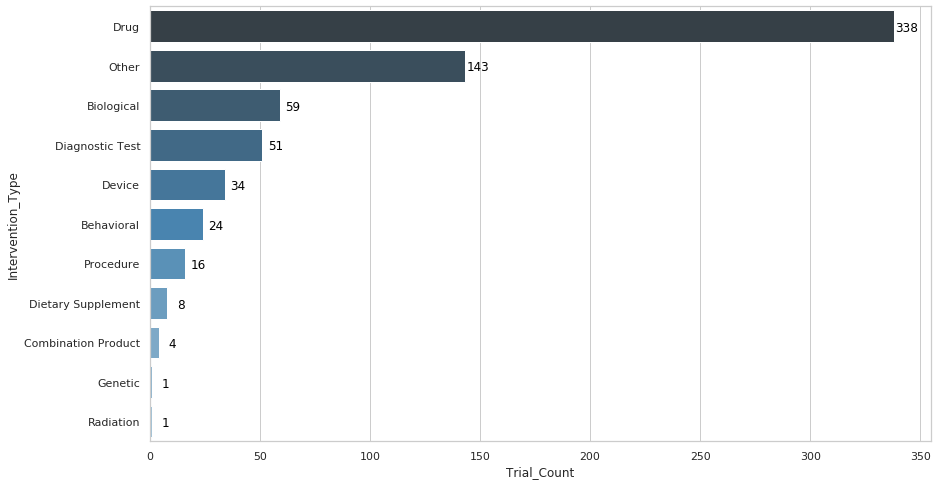

In [15]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

In [16]:
tt = pd.DataFrame(df.groupby("DesignPrimaryPurpose").DesignPrimaryPurpose.count())
tt = tt.rename(index=str, columns={"DesignPrimaryPurpose": "Trial_Count"})
tt['Primary_Purpose'] = tt.index
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt = tt.reset_index(drop=True)
tt

,Trial_Count,Primary_Purpose
0,366,Treatment
1,73,Prevention
2,18,Supportive Care
3,12,Diagnostic
4,10,Other
5,5,Screening
6,4,Basic Science
7,2,Health Services Research


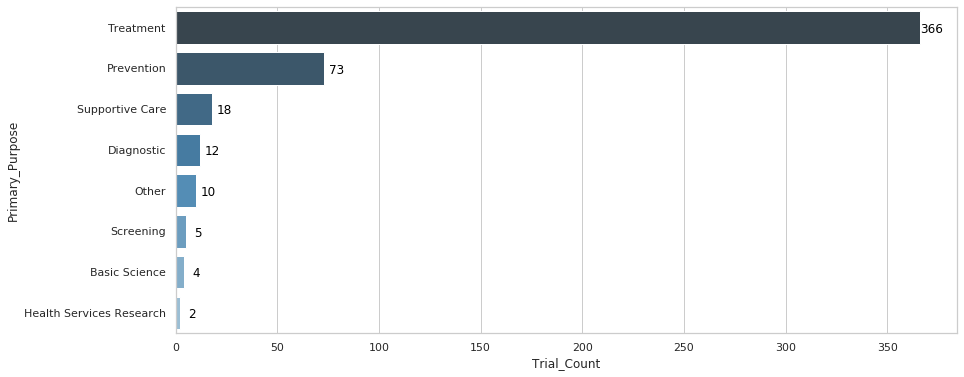

In [17]:
plt.figure(figsize=(14,6))
graph = sns.barplot(y="Primary_Purpose", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

In [18]:
tt = df.loc[df.DesignPrimaryPurpose=='Treatment',]
tt.shape

(366, 21)

In [19]:
tt = pd.DataFrame(tt.groupby("InterventionType").InterventionType.count())
tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
tt['Intervention_Type'] = tt.index
tt = tt.reset_index(drop=True)
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt

,Trial_Count,Intervention_Type
5,273,Drug
1,41,Biological
7,18,Other
3,11,Device
0,7,Behavioral
8,7,Procedure
4,4,Dietary Supplement
2,3,Combination Product
6,1,Genetic
9,1,Radiation


Text(0.5, 1.0, 'Intervention Type distribution where Purpose = Treatment')

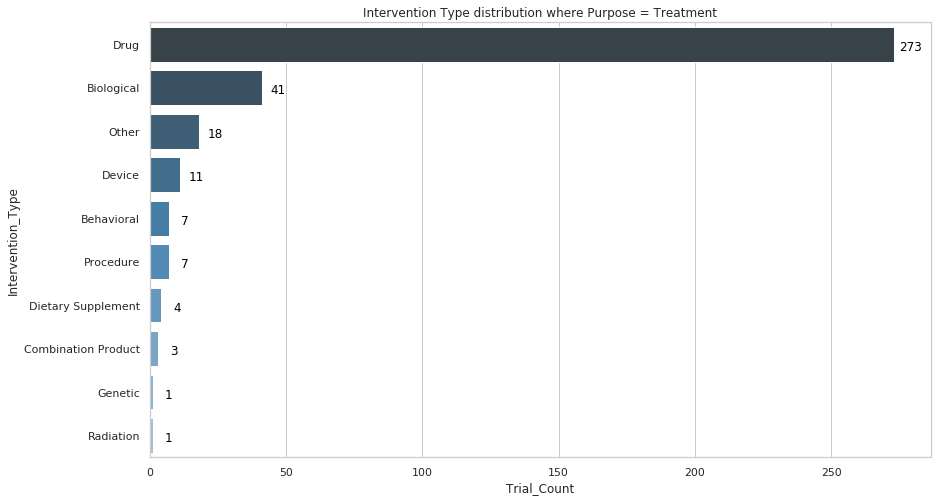

In [20]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')
graph.set_title('Intervention Type distribution where Purpose = Treatment')

**Lets look at the widely used drugs for treatment of covid-19**

In [21]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((191, 2),
                InterventionName  NCTId
 79           Hydroxychloroquine     26
 164                 Tocilizumab      7
 87   Hydroxychloroquine Sulfate      5
 137                  Remdesivir      5
 65                  Favipiravir      4
 47                       DAS181      4
 44                   Colchicine      4
 20                 Azithromycin      4
 105         Lopinavir/ritonavir      4
 120            Nitric Oxide Gas      3
 33                  Chloroquine      3
 31            Camostat Mesilate      3
 146                   Sarilumab      3
 140                 Ruxolitinib      3
 106                    Losartan      3)

**Lets look at the widely used biologicals for treatment of covid-19**

In [22]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Biological'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((31, 2),
                                      InterventionName  NCTId
 8                                 Convalescent Plasma      6
 29                anti-SARS-CoV-2 convalescent plasma      3
 24                                            UC-MSCs      3
 17                                               MSCs      2
 0                              Allogeneic NK transfer      1
 16  Injection and infusion of LV-SMENP-DC vaccine ...      1
 28  allogeneic human dental pulp stem cells (BSH B...      1
 27                                            WJ-MSCs      1
 26       Umbilical cord Wharton's jelly-derived human      1
 25              Umbilical Cord Mesenchymal Stem Cells      1
 23                             Pathogen-specific aAPC      1
 22                                          NestCell®      1
 21  NK cells,IL15-NK cells,NKG2D CAR-NK cells,ACE2...      1
 20                                           NK Cells      1
 19  Multiple Doses of Anti-SARS-CoV-2 convalescent...      

In [23]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Dietary Supplement'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((4, 2),
   InterventionName  NCTId
 0    Natural Honey      1
 1        Vitamin C      1
 2        Vitamin D      1
 3   Zinc gluconate      1)

Let's make this exploration 

In [29]:
from ipywidgets import interact

In [31]:
@interact(hue=['Drug','Biological','device','Behavioral','Dietary Supplement'])
def plot(hue):
    tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType==hue),]
    tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
    covid_drugs = tt1.sort_values('NCTId', ascending=False)
    print(covid_drugs.iloc[:15,])

interactive(children=(Dropdown(description='hue', options=('Drug', 'Biological', 'device', 'Behavioral', 'Diet…

In [28]:
import chart_studio.plotly as py